In [1]:
# Notebook for comparing move-types and their resulting likelihood trajectories

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.sparse as sp

from sbm.io import GraphLoader
from sbm.block_assigner import AssignerConstructor
from sbm.model import SBMModel

from sbm.utils.pipeline_utils import (
    sbmfit_folderpath,
    FitConfig,
)

In [3]:
g = GraphLoader.load(
    Path("/Users/lmmi/anon_sbm/data/processed/congress_twitter.edgelist"),
    force_undirected=True, # type: ignore
    )

In [4]:
rng = np.random.default_rng(1) # type: ignore

In [ ]:
assigner_const = AssignerConstructor(rng=rng)
assigner = assigner_const.create_assigner(
    graph_data=g,
    min_block_size=5, # type: ignore
    init_method="uniform", # type: ignore
    )

block_data = assigner.compute_assignment()

ProNE embedding took 0.14 seconds for 475 nodes.
KMeans with constraints took 0.60 seconds for 475 nodes.


In [6]:
uniform_swap_model = SBMModel(
    initial_blocks=block_data,
    rng=rng,
    change_freq = { # probabilities of trying each move type
        "uniform_swap": 1,
    },
)

edge_swap_model = SBMModel(
    initial_blocks=block_data,
    rng=rng,
    change_freq = { # probabilities of trying each move type
    "uniform_swap": 0.8,
    "edge_based_swap": 0.1,
    "triadic_swap": 0.1,
    },
)
triad_swap_model = SBMModel(
    initial_blocks=block_data,
    rng=rng,
    change_freq = { # probabilities of trying each move type
    "triadic_swap": 1.0,
    },
)

In [7]:
max_num_iterations = int(1e5)
min_block_size = 5
initial_temperature = 1.0
cooling_rate = 0.999
max_blocks = None
patience  = int(1e3)
return_ll = True

In [8]:
uniform_ll = uniform_swap_model.fit(
    max_num_iterations=max_num_iterations,
    min_block_size=min_block_size,
    initial_temperature=initial_temperature,
    cooling_rate=cooling_rate,
    max_blocks=max_blocks,
    patience=patience,
    return_ll=return_ll,
)

Stopping early after 27012 iterations due to patience limit.


In [9]:
edge_ll = edge_swap_model.fit(
    max_num_iterations=max_num_iterations,
    min_block_size=min_block_size,
    initial_temperature=initial_temperature,
    cooling_rate=cooling_rate,
    max_blocks=max_blocks,
    patience=patience,
    return_ll=return_ll,
)

Stopping early after 2345 iterations due to patience limit.


In [10]:
triad_ll = triad_swap_model.fit(
    max_num_iterations=max_num_iterations,
    min_block_size=min_block_size,
    initial_temperature=initial_temperature,
    cooling_rate=cooling_rate,
    max_blocks=max_blocks,
    patience=patience,
    return_ll=return_ll,
)

Stopping early after 3040 iterations due to patience limit.


/var/folders/y6/j9fbqcvx6lb5l99614n30y4c0000gn/T/ipykernel_29400/3143086871.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


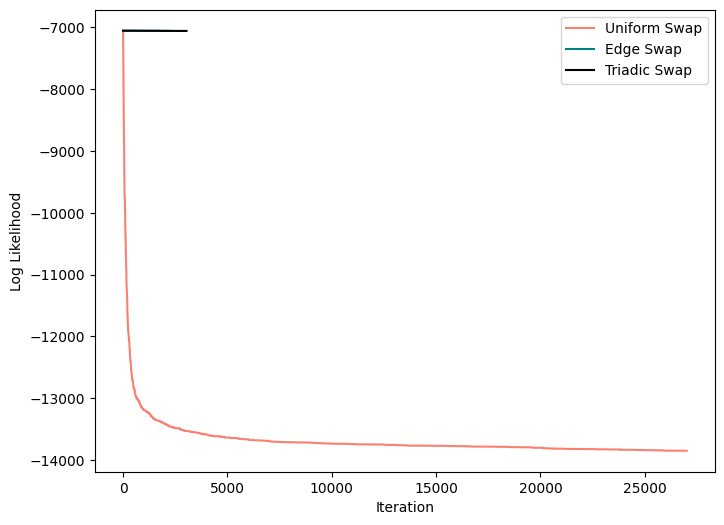

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(uniform_ll, label="Uniform Swap", color="salmon")
ax.plot(edge_ll, label="Edge Swap", color="teal")
ax.plot(triad_ll, label="Triadic Swap", color="black")

ax.set_xlabel("Iteration")
ax.set_ylabel("Log Likelihood")

ax.legend()
fig.show()